In [2]:
import os
os.environ["JAVA_HOME"] = "C:\Program Files\Java\jdk-11.0.13"
os.environ["SPARK_HOME"] = "C:\Spark\spark-3.2.0-bin-hadoop3.2"
os.environ["HADOOP_HOME"] = "C:\Spark\spark-3.2.0-bin-hadoop3.2"
#os.environ["PYSPARK_PYTHON"] = "C:\Users\Liu\anaconda3\python.exe"

In [3]:
import os
print(os.environ['SPARK_HOME'])
print(os.environ['JAVA_HOME'])
print(os.environ['PATH'])

C:\Spark\spark-3.2.0-bin-hadoop3.2
C:\Program Files\Java\jdk-11.0.13
C:\Users\Liu\anaconda3\envs\PySpark_DS;C:\Users\Liu\anaconda3\envs\PySpark_DS\Library\mingw-w64\bin;C:\Users\Liu\anaconda3\envs\PySpark_DS\Library\usr\bin;C:\Users\Liu\anaconda3\envs\PySpark_DS\Library\bin;C:\Users\Liu\anaconda3\envs\PySpark_DS\Scripts;C:\Users\Liu\anaconda3\envs\PySpark_DS\bin;C:\Users\Liu\anaconda3\condabin;C:\Program Files\Common Files\Oracle\Java\javapath;C:\Program Files (x86)\Common Files\Oracle\Java\javapath;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0;C:\Windows\System32\OpenSSH;C:\Program Files\Microsoft VS Code\bin;C:\Program Files\Git\cmd;C:\spark\spark-3.1.2-bin-hadoop3.2\bin;C:\Program Files\Java\jre1.8.0_301\bin;C:\Program Files\Java\jdk-11.0.13;C:\Program Files\Microsoft SQL Server\120\Tools\Binn;C:\Program Files\Common Files\Autodesk Shared;C:\Program Files\Microsoft SQL Server\Client SDK\ODBC\170\Tools\Binn;C:\Program Files (x86)\M

In [ ]:
!pip install -q findspark

In [4]:
import findspark
findspark.init("C:\Spark\spark-3.2.0-bin-hadoop3.2")


In [5]:
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf

conf = SparkConf().set('spark.ui.port','4050')
sc = SparkContext(conf=conf,appName="ExeApp")
#ss = SparkSession.builder.master('localhost[*]').getOrCreate()
ss = SparkSession.builder.master('local[*]').getOrCreate()
spark = ss

## Exercício 1

Objetivo: Identificar quais palavras mais ocorrem no texto
Passos:
- Ler da pasta Dados\E1\texto.txt
- Quebrar o texto em um array
- Filtrar palavras maior que 2 caracteres
- atribuir o valor 1 para cada item do array
- Agrupar por chave
- Ordenar por chave
- Ordenar por valor
- Serializar os resultados

In [6]:
rddExe1 = ss.sparkContext.textFile("Dados/E1/texto.txt")

In [7]:
# Quebrar o texto em um array
rdd2 = rddExe1.flatMap(lambda x: x.split())
rdd2.take(10)

['BÍBLIA',
 'SAGRADA',
 'Tradução:',
 'João',
 'Ferreira',
 'de',
 'Almeida',
 'Edição',
 'Revista',
 'e']

In [8]:
# Filtrar maior que 2 caract
rdd3 = rdd2.filter(lambda x: len(x) > 2) 

In [10]:
# Atribuir valor 1 em cada array
rdd4 = rdd3.map(lambda x: (x,1)) 
rdd4.take(10)

[('BÍBLIA', 1),
 ('SAGRADA', 1),
 ('Tradução:', 1),
 ('João', 1),
 ('Ferreira', 1),
 ('Almeida', 1),
 ('Edição', 1),
 ('Revista', 1),
 ('Corrigida', 1),
 ('ANTIGO', 1)]

In [11]:
# Agrupar por chave
rdd5 = rdd4.reduceByKey(lambda x,y: x+y) 
rdd5.take(10)

[('BÍBLIA', 1),
 ('SAGRADA', 1),
 ('Tradução:', 1),
 ('Ferreira', 1),
 ('Almeida', 1),
 ('Revista', 1),
 ('princípio', 58),
 ('criou', 20),
 ('Deus', 2179),
 ('terra.', 367)]

In [12]:
# Ordenar por chave
#rdd6 = rdd5.sortBy(lambda x: x[0], False)
rdd6 = rdd5.sortByKey(False)
rdd6.take(10)

[('útil;', 1),
 ('útil.', 1),
 ('útil,', 1),
 ('útil', 3),
 ('único;', 1),
 ('único,', 2),
 ('único', 23),
 ('única;', 1),
 ('única,', 1),
 ('única', 8)]

In [13]:
# Ordenar por valor
rdd6 = rdd5.sortBy(lambda x: x[1], False) 
rdd6.take(10)

[('que', 20458),
 ('para', 8421),
 ('não', 6991),
 ('com', 4876),
 ('dos', 4696),
 ('Senhor', 4006),
 ('por', 3812),
 ('seu', 3699),
 ('como', 3635),
 ('sua', 3410)]

## Exercício 2

- Objetivo: Identificar os logs em com erro
- Ler da pasta Dados/E2/logs.txt
- Passar todas palavras para minúsculas
- Pegar apenas as linhas que **contém** a palavra “erro”
  - Dica: Utilize
    ```
    import re
    re.match(pattern, string)
    ```
- Contar as palavras
- Ordenar pelas palavras que mais se repetem
- Salvar os resultados
- Exibir num gráfico de barras os 20 primeiros códigos (números) de erros que mais ocorrem


In [14]:
import re
logfile = "Dados/E2/logs.txt"
rddExe2 = sc.textFile(logfile)

In [ ]:
#rddExe2.collect()
#rddExe2.map(str.split).take(10)

In [15]:
rddExe2.count()

17250

In [16]:
# Passar todas palavras para minúsculas
rdd2 = rddExe2.map(lambda x: x.lower())
rdd2.take(5)

['nível\tdata e hora\tfonte\tidentificação do evento\tcategoria da tarefa',
 'informações\t25/04/2018 21:09:11\tvss\t8224\tnenhum\to serviço vss está sendo desligado devido ao tempo limite ocioso. ',
 'informações\t25/04/2018 21:07:11\tesent\t916\tgeral\tsvchost (9132,g,0) o recurso beta esediskflushconsistency está habilitado em esent devido às configurações de modo de site beta 0x800000.',
 'informações\t25/04/2018 21:07:11\tesent\t916\tgeral\tdllhost (10820,g,0) o recurso beta esediskflushconsistency está habilitado em esent devido às configurações de modo de site beta 0x800000.',
 'informações\t25/04/2018 21:04:06\tesent\t916\tgeral\tsvchost (5812,g,0) o recurso beta esediskflushconsistency está habilitado em esent devido às configurações de modo de site beta 0x800000.']

In [17]:
# Pegar apenas as linhas que contém a palavra “erro”
#rdd3 = rdd2.filter(lambda x: re.match('erro', x))
rdd3 = rdd2.filter(lambda x: re.search(' erro ', x))
rdd3.take(1000)

['erro\t21/04/2018 18:56:11\tvss\t8193\tnenhum\t"erro do serviço de cópias de sombra de volume: erro inesperado ao chamar a rotina queryfullprocessimagenamew.  hr = 0x8007001f, um dispositivo conectado ao sistema não está funcionando.',
 'aviso\t15/04/2018 21:14:25\tmicrosoft-windows-appmodel-state\t20\tnenhum\treparo disparado porque a operação localsettings com o pacote microsoft.windows.contentdeliverymanager_cw5n1h2txyewy encontrou o erro -2147009096.',
 'aviso\t15/04/2018 21:14:25\tmicrosoft-windows-appmodel-state\t20\tnenhum\treparo disparado porque a operação localsettings com o pacote microsoft.windows.contentdeliverymanager_cw5n1h2txyewy encontrou o erro -2147009096.',
 'aviso\t15/04/2018 21:14:25\tmicrosoft-windows-appmodel-state\t20\tnenhum\treparo disparado porque a operação localsettings com o pacote microsoft.windows.contentdeliverymanager_cw5n1h2txyewy encontrou o erro -2147009096.',
 'aviso\t15/04/2018 21:14:25\tmicrosoft-windows-appmodel-state\t20\tnenhum\treparo dispa

In [18]:
rdd4 = rdd3.flatMap(lambda x: x.split()) #Quebrar texto
rdd4.take(100)

['erro',
 '21/04/2018',
 '18:56:11',
 'vss',
 '8193',
 'nenhum',
 '"erro',
 'do',
 'serviço',
 'de',
 'cópias',
 'de',
 'sombra',
 'de',
 'volume:',
 'erro',
 'inesperado',
 'ao',
 'chamar',
 'a',
 'rotina',
 'queryfullprocessimagenamew.',
 'hr',
 '=',
 '0x8007001f,',
 'um',
 'dispositivo',
 'conectado',
 'ao',
 'sistema',
 'não',
 'está',
 'funcionando.',
 'aviso',
 '15/04/2018',
 '21:14:25',
 'microsoft-windows-appmodel-state',
 '20',
 'nenhum',
 'reparo',
 'disparado',
 'porque',
 'a',
 'operação',
 'localsettings',
 'com',
 'o',
 'pacote',
 'microsoft.windows.contentdeliverymanager_cw5n1h2txyewy',
 'encontrou',
 'o',
 'erro',
 '-2147009096.',
 'aviso',
 '15/04/2018',
 '21:14:25',
 'microsoft-windows-appmodel-state',
 '20',
 'nenhum',
 'reparo',
 'disparado',
 'porque',
 'a',
 'operação',
 'localsettings',
 'com',
 'o',
 'pacote',
 'microsoft.windows.contentdeliverymanager_cw5n1h2txyewy',
 'encontrou',
 'o',
 'erro',
 '-2147009096.',
 'aviso',
 '15/04/2018',
 '21:14:25',
 'microsoft

In [19]:
#Contar as palavras
rdd44 = rdd4.count()
rdd44

5902

In [20]:
# Ordenar pelas palavras que mais se repetem
rddx = rdd4
rdd5 = rddx.map(lambda x: (x,1)) #atribuir valor 1 em cada array
rdd6 = rdd5.reduceByKey(lambda x,y: x+y) #agrupar por chave
rdd7 = rdd6.sortBy(lambda x: x[1], False)
#rdd8 = rdd7.filter(lambda x: len(x[0]) > 5)
rdd7.take(50)

[('do', 392),
 ('produto:', 378),
 ('microsoft', 266),
 ('o', 214),
 ('da', 181),
 ('nome', 181),
 ('0.', 180),
 ('erro', 147),
 ('de', 137),
 ('nenhum', 132),
 ('ou', 127),
 ('windows', 127),
 ('installer', 126),
 ('versão', 126),
 ('êxito', 126),
 ('informações', 126),
 ('msiinstaller', 126),
 ('idioma', 126),
 ('fabricante:', 126),
 ('status', 126),
 ('corporation.', 112),
 ('2013.', 106),
 ('15.0.4569.1506.', 106),
 ('office', 88),
 ('produto.', 71),
 ('instalou', 68),
 ('instalação:', 68),
 ('for', 60),
 ('10/04/2018', 58),
 ('update', 57),
 ('reconfiguração:', 56),
 ('uma', 56),
 ('1035', 56),
 ('reconfigurou', 56),
 ('atualização.', 55),
 ('atualização:', 55),
 ('1036', 55),
 ('64-bit', 54),
 ('edition.', 54),
 ('17/03/2018', 50),
 ('2013', 47),
 ('(portuguese', 46),
 ('mui', 46),
 ('(brazil))', 46),
 ('1046.', 46),
 ('professional', 32),
 ('32-bit', 32),
 ('plus', 32),
 ('security', 30),
 ('components', 28)]

In [26]:
# Salvar os resultados
arquivoex2 = r"Dados/Resultados/Liu_Exercicio2_1.txt"
os.remove(arquivoex2)
rdd7.saveAsTextFile(arquivoex2)

PermissionError: [WinError 5] Acesso negado: 'Dados/Resultados/Liu_Exercicio2_1.txt'

In [ ]:
# Exibir os 20 primeiros erros que mais ocorrem
rdd8 = rdd4.map(lambda x: re.match('^0x[a-zA-Z0-9]'))
rdd8.take(10)

In [28]:
rdd2.take(1000)

['nível\tdata e hora\tfonte\tidentificação do evento\tcategoria da tarefa',
 'informações\t25/04/2018 21:09:11\tvss\t8224\tnenhum\to serviço vss está sendo desligado devido ao tempo limite ocioso. ',
 'informações\t25/04/2018 21:07:11\tesent\t916\tgeral\tsvchost (9132,g,0) o recurso beta esediskflushconsistency está habilitado em esent devido às configurações de modo de site beta 0x800000.',
 'informações\t25/04/2018 21:07:11\tesent\t916\tgeral\tdllhost (10820,g,0) o recurso beta esediskflushconsistency está habilitado em esent devido às configurações de modo de site beta 0x800000.',
 'informações\t25/04/2018 21:04:06\tesent\t916\tgeral\tsvchost (5812,g,0) o recurso beta esediskflushconsistency está habilitado em esent devido às configurações de modo de site beta 0x800000.',
 'informações\t25/04/2018 21:02:01\tesent\t916\tgeral\tdllhost (10820,g,0) o recurso beta esediskflushconsistency está habilitado em esent devido às configurações de modo de site beta 0x800000.',
 'informações\t25/

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
def histograma(words):
    dados = dict(words)
    y,x = zip(*sorted(zip(dados.values(),[str(i) for i in dados.keys()])))
    plt.barh(x, y, color='g')

In [31]:
wordsS = rdd7.map(lambda x:(x[1],x[0])).sortByKey(False)
wordsS.take(10)

[(392, 'do'),
 (378, 'produto:'),
 (266, 'microsoft'),
 (214, 'o'),
 (181, 'da'),
 (181, 'nome'),
 (180, '0.'),
 (147, 'erro'),
 (137, 'de'),
 (132, 'nenhum')]

In [32]:
wordsF = wordsS.map(lambda x:(x[1], x[0]))
wordsF.take(10)

[('do', 392),
 ('produto:', 378),
 ('microsoft', 266),
 ('o', 214),
 ('da', 181),
 ('nome', 181),
 ('0.', 180),
 ('erro', 147),
 ('de', 137),
 ('nenhum', 132)]

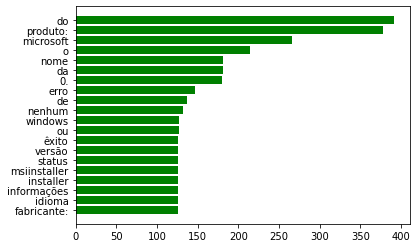

In [33]:
histograma(wordsF.take(20))

## Exercicio 2b

- Objetivo: Identificar os logs em com erro
- Ler da pasta Dados/E2/logs.txt
- Passar todas palavras para minúsculas
- Pegar apenas as linhas que **iniciam** a palavra “erro”
  - Dica: Utilize
    ```
    import re
    re.match(pattern, string)
    ```
- Filtrar apenas os dígitos (não palavras)
- Contar
- Ordenar pelas palavras que mais se repetem
- Salvar os resultados
- Exibir num gráfico de barras os 20 primeiros códigos (números) de erros que mais ocorrem


In [34]:
#Contar as palavras
rddExe2x = rddExe2.map(lambda x: (x,1))
rddExe2y = rddExe2x.reduceByKey(lambda x,y: x+y)

#Ordenar pelas palavras que mais se repetem
rddExe2z = rddExe2y.sortBy(lambda x: x[1],False)

#Apenas para remover virgulas e caracteres indesejados
rddExe2finalb = rddExe2z.filter(lambda x: len(x[0]) > 1)
rddExe2finalb.take(10)

[('As seguintes informações foram incluídas com o evento: ', 343),
 ('Se o evento foi originado em outro computador, as informações de exibição tiveram que ser salvas com o evento.',
  343),
 ('ID do CAB: 0', 170),
 ('Arquivos anexados:', 170),
 ('Símbolo da análise: ', 170),
 ('Resposta: Não disponível', 170),
 ('Assinatura do problema:', 170),
 ('Esses arquivos podem estar disponíveis em:', 170),
 ('Verificando novamente solução: 0', 170),
 ('Status do Licenciamento=', 124)]

In [ ]:
#Salvar os resultados
rddExe2finalb.saveAsTextFile("Dados/content/log_erros_ex2b.txt")
rddExe2y.saveAsTextFile("Dados/content/palavras_contadas_log_ex2b.txt")

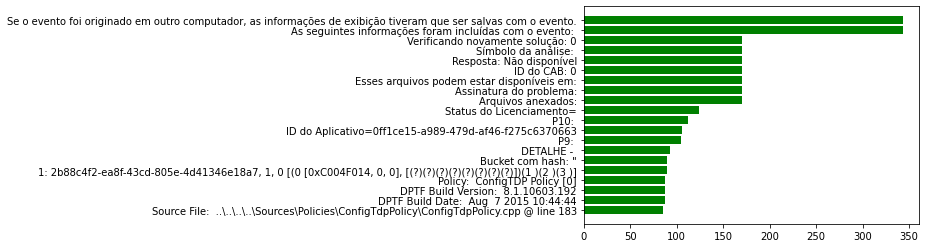

In [37]:
#Exibir num gráfico de barras os 20 primeiros códigos (números) de erros que mais ocorrem

wordsA = rddExe2finalb.map(lambda x:(x[1],x[0])).sortByKey(False)

wordsB = wordsA.map(lambda x:(x[1], x[0]))


histograma(wordsB.take(20))

## Exercicio 3

-  Objetivo Identificar os veículos
- Utilizando as informações da Pasta Dados/E3/registrosPlacas.txt, levantar as
seguintes informações:
  - Preparar os dados
  - Identificar o veículo que tem mais registros
  - Identificar qual veículo teve a maior velocidade
  - Identificar qual veículo teve a maior velocidade média


In [38]:
from pyspark.sql import SQLContext
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, FloatType
from pyspark.sql import functions as F
sqlc = SQLContext(sc)

C:\Spark\spark-3.2.0-bin-hadoop3.2\python\pyspark\sql\context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [39]:
df = sqlc.read.csv("Dados/E3/registrosPlacas.txt", sep='\t')

In [40]:
df.show()

+------------+--------+--------------------+-------+
|         _c0|     _c1|                 _c2|    _c3|
+------------+--------+--------------------+-------+
|KXU2333,5090|Curitiba|Sat Jan 01 00:00:...|88 km/h|
|XNM0943,7025|Londrina|Sat Jan 01 00:00:...|55 km/h|
|KXU2333,5190|Londrina|Sat Jan 01 00:00:...|84 km/h|
|XNM0943,7026| Maringá|Sat Jan 01 00:00:...|59 km/h|
|XNM0943,7027| Maringá|Sat Jan 01 00:00:...|59 km/h|
|XNM0943,7028| Maringá|Sat Jan 01 00:00:...|59 km/h|
|XNM0943,7128|Londrina|Sat Jan 01 00:00:...|59 km/h|
|GKK7588,0351| Maringá|Sat Jan 01 00:00:...|27 km/h|
|XNM0943,7129| Maringá|Sat Jan 01 00:00:...|50 km/h|
|KXU2333,5290|Londrina|Sat Jan 01 00:00:...|86 km/h|
|XNM0943,7130| Maringá|Sat Jan 01 00:00:...|49 km/h|
|KXU2333,5390|Londrina|Sat Jan 01 00:00:...|86 km/h|
|XNM0943,7131| Maringá|Sat Jan 01 00:00:...|42 km/h|
|KXU2333,5490|Londrina|Sat Jan 01 00:00:...|85 km/h|
|XNM0943,7132| Maringá|Sat Jan 01 00:00:...|42 km/h|
|XNM0943,7133| Maringá|Sat Jan 01 00:01:...|48

In [41]:
separar_virgula = F.udf(lambda f: f.split(","))
substituir = F.udf(lambda f: f.replace(" km/h", ""))
#substring = F.udf(lambda f: f.substring(f, 1, 7))

In [42]:
df = df.withColumn("_c01", F.split('_c0', ',')[0])
df = df.withColumn("_c02", F.split('_c0', ',')[1])
#df.show()

In [43]:
df = df.withColumn('_c3', substituir(df._c3))

In [44]:
df = df.withColumn('_c3', df._c3.cast('float'))

In [45]:
df.show()

+------------+--------+--------------------+----+-------+----+
|         _c0|     _c1|                 _c2| _c3|   _c01|_c02|
+------------+--------+--------------------+----+-------+----+
|KXU2333,5090|Curitiba|Sat Jan 01 00:00:...|88.0|KXU2333|5090|
|XNM0943,7025|Londrina|Sat Jan 01 00:00:...|55.0|XNM0943|7025|
|KXU2333,5190|Londrina|Sat Jan 01 00:00:...|84.0|KXU2333|5190|
|XNM0943,7026| Maringá|Sat Jan 01 00:00:...|59.0|XNM0943|7026|
|XNM0943,7027| Maringá|Sat Jan 01 00:00:...|59.0|XNM0943|7027|
|XNM0943,7028| Maringá|Sat Jan 01 00:00:...|59.0|XNM0943|7028|
|XNM0943,7128|Londrina|Sat Jan 01 00:00:...|59.0|XNM0943|7128|
|GKK7588,0351| Maringá|Sat Jan 01 00:00:...|27.0|GKK7588|0351|
|XNM0943,7129| Maringá|Sat Jan 01 00:00:...|50.0|XNM0943|7129|
|KXU2333,5290|Londrina|Sat Jan 01 00:00:...|86.0|KXU2333|5290|
|XNM0943,7130| Maringá|Sat Jan 01 00:00:...|49.0|XNM0943|7130|
|KXU2333,5390|Londrina|Sat Jan 01 00:00:...|86.0|KXU2333|5390|
|XNM0943,7131| Maringá|Sat Jan 01 00:00:...|42.0|XNM094

In [46]:
df

DataFrame[_c0: string, _c1: string, _c2: string, _c3: float, _c01: string, _c02: string]

In [47]:
df2 = df.groupBy(df._c01, df._c1).count()
df2.sort("count", ascending=False).show()

+-------+--------+-----+
|   _c01|     _c1|count|
+-------+--------+-----+
|DKG9712|Umuarama| 2038|
|DKG9712|Londrina| 2038|
|BYO5817|Umuarama| 1942|
|MGO1072|Londrina| 1933|
|BYO5817|Londrina| 1913|
|JSQ9319|Umuarama| 1906|
|BWD3055|Curitiba| 1904|
|KZH5426|Umuarama| 1897|
|MGO1072|Umuarama| 1897|
|BWD3055| Maringá| 1894|
|ZCN1774|Londrina| 1894|
|XJR4324| Maringá| 1887|
|XGC4049|Curitiba| 1883|
|XJR4324|Curitiba| 1856|
|DXF3338|Umuarama| 1855|
|JSQ9319|Londrina| 1855|
|NDH5121|Umuarama| 1854|
|NDH5121|Londrina| 1854|
|CVV0439|Curitiba| 1853|
|FMS8593|Curitiba| 1853|
+-------+--------+-----+
only showing top 20 rows



In [48]:
df3 = df.groupBy(df._c01, df._c1).max('_c3')
df3.sort("max(_c3)", ascending=False).show()

+-------+--------+--------+
|   _c01|     _c1|max(_c3)|
+-------+--------+--------+
|GZH9344| Maringá|   162.0|
|GZH9344|Londrina|   161.0|
|GZH9344|Umuarama|   161.0|
|GZH9344|Curitiba|   160.0|
|UFC2015|Umuarama|   158.0|
|UFC2015|Curitiba|   158.0|
|UFC2015| Maringá|   157.0|
|UFC2015|Londrina|   157.0|
|GKK7588| Maringá|   156.0|
|WYL3175|Umuarama|   155.0|
|WYL3175| Maringá|   155.0|
|RDN8228|Curitiba|   155.0|
|RDN8228| Maringá|   155.0|
|GKK7588|Curitiba|   155.0|
|RDN8228|Umuarama|   155.0|
|WYL3175|Londrina|   155.0|
|RDN8228|Londrina|   155.0|
|GKK7588|Londrina|   154.0|
|GKK7588|Umuarama|   154.0|
|WYL3175|Curitiba|   153.0|
+-------+--------+--------+
only showing top 20 rows



In [49]:
df.groupBy().avg('_c3').show()

+-----------------+
|         avg(_c3)|
+-----------------+
|67.06565285714285|
+-----------------+



In [50]:
df4 = df.groupBy(df._c01, df._c1).avg('_c3')
df4.sort("avg(_c3)", ascending=False).show()

+-------+--------+------------------+
|   _c01|     _c1|          avg(_c3)|
+-------+--------+------------------+
|EZB0648|Curitiba|109.07736720554273|
|EZB0648|Umuarama|109.02045328911001|
|EZB0648|Londrina|108.56337209302326|
|EZB0648| Maringá|107.97987349051179|
|QZQ0584|Londrina| 99.65101449275362|
|GKK7588|Curitiba| 99.45414364640884|
|QZQ0584|Umuarama| 99.04085155350978|
|GKK7588| Maringá| 98.78180803571429|
|QZQ0584| Maringá| 98.52495793606282|
|RZW5936|Umuarama| 97.44110854503464|
|QZQ0584|Curitiba| 97.09806157354618|
|GKK7588|Londrina| 96.81419503750722|
|UFC2015|Londrina|  96.7821325648415|
|RZW5936|Curitiba| 96.66666666666667|
|CVV0439|Curitiba| 96.51106314085267|
|GKK7588|Umuarama|  96.5003003003003|
|CVV0439|Umuarama| 95.90459153249851|
|RZW5936| Maringá|  95.7987668161435|
|UFC2015|Umuarama| 94.72254004576659|
|CVV0439|Londrina| 94.60168471720819|
+-------+--------+------------------+
only showing top 20 rows



In [51]:
from pyspark.sql import SQLContext
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, FloatType, DateType
from pyspark.sql import functions as F
sqlc = SQLContext(sc)

In [52]:
schema = StructType([
    StructField("id", IntegerType(), True ),
    StructField("name", StringType(), True),
    StructField("coords", StringType(), True),
    StructField("start_year", IntegerType(), True ),
    StructField("url_name", StringType(), True),
    StructField("country", StringType(), True),
    StructField("country_state", StringType(), True)])

df = sqlc.read.csv("Dados/Etrabalho/cities.csv",schema, header=True)
df.createOrReplaceTempView("cities")

In [53]:
schema2 = StructType([
    StructField("id", IntegerType(), True ),
    StructField("city_id", IntegerType(), True),
    StructField("name", StringType(), True),
    StructField("url_name", StringType(), True ),
    StructField("color", StringType(), True),
    StructField("system_id", IntegerType(), True),
    StructField("transport_mode_id", IntegerType(), True)])

df2 = sqlc.read.csv("Dados/Etrabalho/lines.csv", schema2, header=True)
df2.createOrReplaceTempView("lines")

In [54]:
schema3 = StructType([
    StructField("id", IntegerType(), True ),
    StructField("name", StringType(), True),
    StructField("geometry", StringType(), True),
    StructField("buildstart", IntegerType(), True ),
    StructField("opening", IntegerType(), True),
    StructField("closure", IntegerType(), True),
    StructField("city_id", IntegerType(), True)])

df3 = sqlc.read.csv("Dados/Etrabalho/stations.csv", schema3, header=True)
df3.createOrReplaceTempView("stations")

In [55]:
schema4 = StructType([
    StructField("id", IntegerType(), True ),
    StructField("station_id", IntegerType(), True),
    StructField("line_id", IntegerType(), True),
    StructField("city_id", IntegerType(), True ),
    StructField("created_at", DateType(), True),
    StructField("updated_at", DateType(), True)])

df4 = sqlc.read.csv("Dados/Etrabalho/station_lines.csv", schema4, header=True)
df4.createOrReplaceTempView("station_lines")

In [56]:
# Qual país possui cidades?
ss.sql('select country, count(name) as contagem from cities \
        group by country \
        order by count(name) desc').show()

+-------------+--------+
|      country|contagem|
+-------------+--------+
|United States|     115|
|       France|      71|
|       Canada|      14|
|        Spain|       8|
|      England|       8|
|    Argentina|       6|
|        China|       6|
|    Australia|       6|
|      Germany|       5|
|        Italy|       5|
|       Mexico|       5|
|        Chile|       4|
|       Brazil|       4|
|        Japan|       4|
|       Russia|       4|
| South Africa|       3|
|        India|       3|
|     Scotland|       3|
|      Austria|       3|
|       Norway|       2|
+-------------+--------+
only showing top 20 rows



In [57]:
# Qual cidade possui linhas?
ss.sql('select c.id, c.name, count(l.name) as contagem \
        from lines as l \
        left join cities as c on c.id = l.city_id \
        group by c.id, c.name \
        order by count(l.name) desc').show()

+---+--------------+--------+
| id|          name|contagem|
+---+--------------+--------+
|114|         Tokyo|     253|
| 91|         Osaka|     112|
| 95|         Paris|      75|
|206|      New York|      70|
|106|     São Paulo|      40|
| 69|        London|      35|
|  4|      Santiago|      34|
|124|    Valparaíso|      31|
| 77|     Melbourne|      31|
| 82|        Munich|      29|
|  1|  Buenos Aires|      28|
| 15|       Beijing|      27|
|139|        Boston|      27|
|265|        Nantes|      26|
|107|      Shanghai|      24|
|102|Rio de Janeiro|      23|
| 78|   Mexico City|      22|
| 27|      Brussels|      22|
| 14|     Barcelona|      19|
| 79|         Milan|      18|
+---+--------------+--------+
only showing top 20 rows



In [58]:
# Quais são 10 linhas que passam por mais cidades?
ss.sql('select l.id, l.name, count(c.id) as cidade \
        from lines as l \
        left join cities as c on c.id = l.city_id \
        group by l.id, l.name \
        order by count(c.id) asc').show(10)

+----+--------------------+------+
|  id|                name|cidade|
+----+--------------------+------+
| 275|Linha 6 • Laranja...|     1|
| 850|         Barrie Line|     1|
|  40|            Línea 4A|     1|
|1481|    Kobe Kosoku Line|     1|
| 506|        T 11 express|     1|
| 687|      Northern Lines|     1|
| 641|        Hondori Line|     1|
| 736|Disneyland Resort...|     1|
|1104|            del Bajo|     1|
|1262|        Jamaica Line|     1|
+----+--------------------+------+
only showing top 10 rows



In [59]:
# Qual é o país que tem mais linhas?

ss.sql('select c.country, count(l.name) as linhas \
        from lines as l \
        left join cities as c on c.id = l.city_id \
        group by c.country \
        order by count(l.name) desc').show()

+-------------+------+
|      country|linhas|
+-------------+------+
|        Japan|   365|
|       France|   202|
|United States|   142|
|        Chile|    70|
|       Brazil|    65|
|        China|    62|
|        Spain|    50|
|    Australia|    45|
|      Germany|    40|
|      England|    40|
|        Italy|    32|
|    Argentina|    28|
|       Canada|    27|
|       Mexico|    22|
|      Belgium|    22|
|      Austria|    20|
|     Scotland|    20|
|     Colombia|    16|
|       Sweden|    12|
|      Bolivia|    11|
+-------------+------+
only showing top 20 rows



In [60]:
# A linha que tem mais estações em seu percurso?

ss.sql('select l.id, l.name, count(distinct sl.station_id) as contagem \
        from station_lines as sl \
        left join lines as l on l.id = sl.line_id \
        left join stations as s on s.id = sl.station_id \
        group by l.id, l.name \
        order by count(distinct sl.station_id) desc \
        ').show()

+----+--------------------+--------+
|  id|                name|contagem|
+----+--------------------+--------+
| 658|                Roca|      95|
| 639|               Mitre|      90|
| 612|                   A|      87|
| 171|        Southeastern|      86|
| 938|                  17|      78|
| 316|             Ligne 1|      75|
| 613|                   B|      74|
| 367|                 T 1|      72|
| 946|                  19|      70|
| 940|                  16|      66|
|1103|               Norte|      66|
| 305|             Linie 1|      62|
| 950|                   A|      62|
| 139|District Line - U...|      62|
|1198|                   1|      60|
| 590|                   1|      60|
| 967|                   A|      59|
| 317|             Ligne 2|      59|
|1253|                   4|      59|
| 172|            Southern|      58|
+----+--------------------+--------+
only showing top 20 rows



In [61]:
# Quais são as 10 cidades que possuem as linhas com mais estações? v1
ss.sql('select  c.name, max(t0.contagem)\
        from lines as l \
        left join cities as c on c.id = l.city_id \
        left join (\
            select sl.line_id, count(distinct sl.station_id) as contagem \
            from station_lines as sl \
            group by sl.line_id) t0 on t0.line_id = l.id \
        group by c.name \
        order by max(t0.contagem) desc \
        ').show(10)

+------------+-------------+
|        name|max(contagem)|
+------------+-------------+
|Buenos Aires|           95|
|    Bordeaux|           87|
|      London|           86|
|      Munich|           78|
|      Nantes|           75|
|       Paris|           72|
|       Tours|           62|
|        Graz|           62|
| Montpellier|           60|
|   Innsbruck|           60|
+------------+-------------+
only showing top 10 rows



In [62]:
# Quais são as 10 cidades que possuem as linhas com mais estações? v2

ss.sql('select c.name, l.name, count(distinct station_id) as contagem \
        from station_lines as sl \
        left join lines as l on l.id = sl.line_id \
        left join stations as s on s.id = sl.station_id \
        left join cities as c on c.id = sl.city_id \
        left join (\
            select sl.line_id, count(distinct sl.station_id) as contagem \
            from station_lines as sl \
            group by sl.line_id) t0 on t0.line_id = sl.line_id \
        group by c.name, l.name \
        order by count(distinct station_id) desc \
        ').show(10)

+------------+------------+--------+
|        name|        name|contagem|
+------------+------------+--------+
|Buenos Aires|        Roca|      95|
|Buenos Aires|       Mitre|      90|
|    Bordeaux|           A|      87|
|      London|Southeastern|      86|
|      Munich|          17|      78|
|    New York|   Main Line|      78|
|      Nantes|     Ligne 1|      75|
|    Bordeaux|           B|      74|
|       Paris|         T 1|      72|
|      Munich|          19|      70|
+------------+------------+--------+
only showing top 10 rows



In [63]:
#Qual país são os mais presentes entre essas 10 cidades?

ss.sql('select country, name from \
                (select c.country ,c.name, max(t0.contagem) \
                from lines as l \
                left join cities as c on c.id = l.city_id \
                left join (\
                    select sl.line_id, count(distinct sl.station_id) as contagem \
                    from station_lines as sl \
                    group by sl.line_id) t0 on t0.line_id = l.id \
                group by c.country, c.name \
                order by max(t0.contagem) desc \
                limit 10) \
        order by country asc \
        ').show()

+---------+------------+
|  country|        name|
+---------+------------+
|Argentina|Buenos Aires|
|  Austria|        Graz|
|  Austria|   Innsbruck|
|  England|      London|
|   France|    Bordeaux|
|   France|      Nantes|
|   France|       Paris|
|   France|       Tours|
|   France| Montpellier|
|  Germany|      Munich|
+---------+------------+



In [64]:
# O país que tem a maior média de estações?
ss.sql('select country, avg(contagem) as media from \
                (select c.country, count(s.id) as contagem \
                from stations as s \
                left join cities as c on c.id = s.city_id \
                group by c.country) \
        group by country \
        order by avg(contagem) desc \
        ').show()

+--------------+------+
|       country| media|
+--------------+------+
|         Japan|4613.0|
|        France|2763.0|
| United States|2001.0|
|       England| 943.0|
|         China| 705.0|
|     Argentina| 685.0|
|          null| 618.0|
|        Mexico| 456.0|
|         Italy| 422.0|
|       Germany| 385.0|
|         Spain| 385.0|
|        Brazil| 381.0|
|         Chile| 306.0|
|       Austria| 306.0|
|        Canada| 218.0|
|      Scotland| 157.0|
|     Australia| 113.0|
|       Hungary|  62.0|
|      Portugal|  56.0|
|Czech Republic|  46.0|
+--------------+------+
only showing top 20 rows



In [65]:
ss.sql('select * from cities').show()

+---+----------+--------------------+----------+----------+----------------+-------------+
| id|      name|              coords|start_year|  url_name|         country|country_state|
+---+----------+--------------------+----------+----------+----------------+-------------+
|  5|  Aberdeen|  POINT(-2.15 57.15)|      2017|  aberdeen|        Scotland|         null|
|  6|  Adelaide|POINT(138.6 -34.9...|      2017|  adelaide|       Australia|         null|
|  7|   Algiers|POINT(3 36.83333333)|      2017|   algiers|         Algeria|         null|
|  9|    Ankara|POINT(32.91666667...|      2017|    ankara|          Turkey|         null|
| 16|     Belém|POINT(-48.4833333...|      2017|     belem|          Brazil|         null|
| 10|  Asunción|POINT(-57.6666666...|      2017|  asuncion|        Paraguay|         null|
| 11|    Athens|POINT(23.71666667...|      2017|    athens|          Greece|         null|
| 12|  Auckland|POINT(174.75 -36....|      2017|  auckland|     New Zealand|         null|

In [66]:
ss.sql('select * from lines').show()

+----+-------+--------------------+--------------------+-------+---------+-----------------+
|  id|city_id|                name|            url_name|  color|system_id|transport_mode_id|
+----+-------+--------------------+--------------------+-------+---------+-----------------+
|  43|      4|             Línea 2|          43-linea-2|#ffbe2e|      267|                4|
|  75|     34|Línea 3 Metro de ...|75-linea-3-metro-...|   #000|      119|             null|
| 107|    126|             Línea 1|         107-linea-1|#434343|      249|             null|
| 604|     74|          La navette|      604-la-navette|#009ab9|      346|             null|
|  61|     66|  Línea 1 (Tramo 1A)|          61-linea-1|#49aa43|      250|             null|
|1471|     91|  Tokaido Shinkansen|1471-tokaido-shin...|#0000ff|      551|                1|
|   5|      1|                   A|                   a|#00b3da|      254|                4|
| 168|    261|             Línea 1|         168-linea-1|#f58223|      

In [ ]:
ss.sql('select * from stations').show()

+----+--------------------+--------------------+----------+-------+-------+-------+
|  id|                name|            geometry|buildstart|opening|closure|city_id|
+----+--------------------+--------------------+----------+-------+-------+-------+
|7694|    Keisei Tsudanuma|POINT(140.0248121...|      1921|   1921| 999999|    114|
|6003|   Kossuth Lajos tér|POINT(19.04623765...|         0|      0| 999999|     29|
|7732|       Saint-Charles|POINT(5.3801556 4...|      1973|   1977| 999999|     74|
|7695|Keisei Makuhari-H...|POINT(140.0421467...|      1991|   1991| 999999|    114|
|7726|           Chartreux|POINT(5.4014815 4...|      1973|   1977| 999999|     74|
|7696|     Keisei Makuhari|POINT(140.0560770...|      1921|   1921| 999999|    114|
|7719|            Malpassé|POINT(5.4165033 4...|      1973|   1977| 999999|     74|
|7697|            Kemigawa|POINT(140.0663045...|      1921|   1921| 999999|    114|
|   1|             Caseros|POINT(-58.3989075...|      2001|   2007|   null| 

In [ ]:
ss.sql('select * from station_lines').show()

+---+----------+-------+-------+----------+----------+
| id|station_id|line_id|city_id|created_at|updated_at|
+---+----------+-------+-------+----------+----------+
| 47|      7754|    570|     74|2017-11-21|2017-11-21|
| 48|      7771|    571|     74|2017-11-21|2017-11-21|
| 49|      7764|    571|     74|2017-11-21|2017-11-21|
| 50|      7763|    571|     74|2017-11-21|2017-11-21|
| 51|      7729|    571|     74|2017-11-21|2017-11-21|
| 52|      7772|    571|     74|2017-11-21|2017-11-21|
| 53|      8523|    582|     70|2017-11-21|2017-11-21|
| 54|      8525|    582|     70|2017-11-21|2017-11-21|
| 55|        93|     10|      1|2017-11-21|2017-11-21|
| 56|      6005|    442|    114|2017-11-21|2017-11-21|
| 57|      6102|    495|    114|2017-11-21|2017-11-21|
| 58|      6006|    439|    114|2017-11-21|2017-11-21|
| 59|      6007|    442|    114|2017-11-21|2017-11-21|
| 61|      6008|    442|    114|2017-11-21|2017-11-21|
| 62|      6009|    439|    114|2017-11-21|2017-11-21|
| 63|     